**Outline**
1. Importing the Libraries
2. Dataset Loading and Description
3. Dataset Visualisation and Feature Selection
3. Train Test Split
4. Single Layer Perceptron Class


# Importing The Libraries

1. Numpy is a library used for Mathematical Computations
2. Matplotlib and Seaborn is used for plotting graphs
3. Pandas is a Library which is used for importing the datasets from csv, xlsx or other formats
4. Sklearn is a machine learning library which is also having some of the most common datasets.
5. TQDM is used to display the progress of the for loop.
6. Warnings are hidden to hide the expoding gradient issue which comes as warning when exponent value increases
7. Normalisation of Dataset is necessary so using sklearn.preprocessing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import sklearn.datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 
from matplotlib import animation, rc
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Dataset and its Description

[Dataset Link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)


**Dataset Description**


*   The dataset comprises 569 Instances and 30 Attributes.
*   There is no Null Values
*   Dataset is Linearly non separable.
*   Name of all the features are given Below









In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
Y = breast_cancer.target

In [4]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [0]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [0]:
data['class'] = breast_cancer.target



*   Data: It stores the X part of the Dataframe
*   Target: It stores the Y Column (0,1)
*   Target Names: It stores what 0 and 1 mean in real sense.

*   DESCR: Using this description of the entire dataset can be displayed

*   Feature_Names: It stores the column Names of all 30 features







In [7]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
data.head()

mean radius  mean texture  ...  worst fractal dimension  class
0        17.99         10.38  ...                  0.11890      0
1        20.57         17.77  ...                  0.08902      0
2        19.69         21.25  ...                  0.08758      0
3        11.42         20.38  ...                  0.17300      0
4        20.29         14.34  ...                  0.07678      0

[5 rows x 31 columns]

In [9]:
data.describe()

mean radius  mean texture  ...  worst fractal dimension       class
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%      11.700000     16.170000  ...                 0.071460    0.000000
50%      13.370000     18.840000  ...                 0.080040    1.000000
75%      15.780000     21.800000  ...                 0.092080    1.000000
max      28.110000     39.280000  ...                 0.207500    1.000000

[8 rows x 31 columns]

In [10]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [11]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [12]:
data.groupby('class').mean()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
class                             ...                                         
0        17.462830     21.604906  ...        0.323468                 0.091530
1        12.146524     17.914762  ...        0.270246                 0.079442

[2 rows x 30 columns]

In [13]:
count = data["class"].value_counts()
count           #Count of Malignant(1) and Beningn(0) Class

1    357
0    212
Name: class, dtype: int64

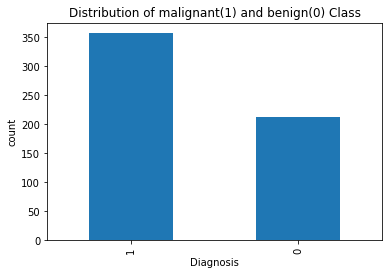

In [14]:
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) Class")
plt.xlabel("Diagnosis")
plt.ylabel("count");

The plot shown below is the comparison of each attribute with remaining all other 29 attributes. This helps us to show the nonlinearity in datapoints.

If we want to make a linearly separable data then such type of features have to be selected

Each plot is having 569 points where Red points represent Malignant Class and green points represents Beningn Class.

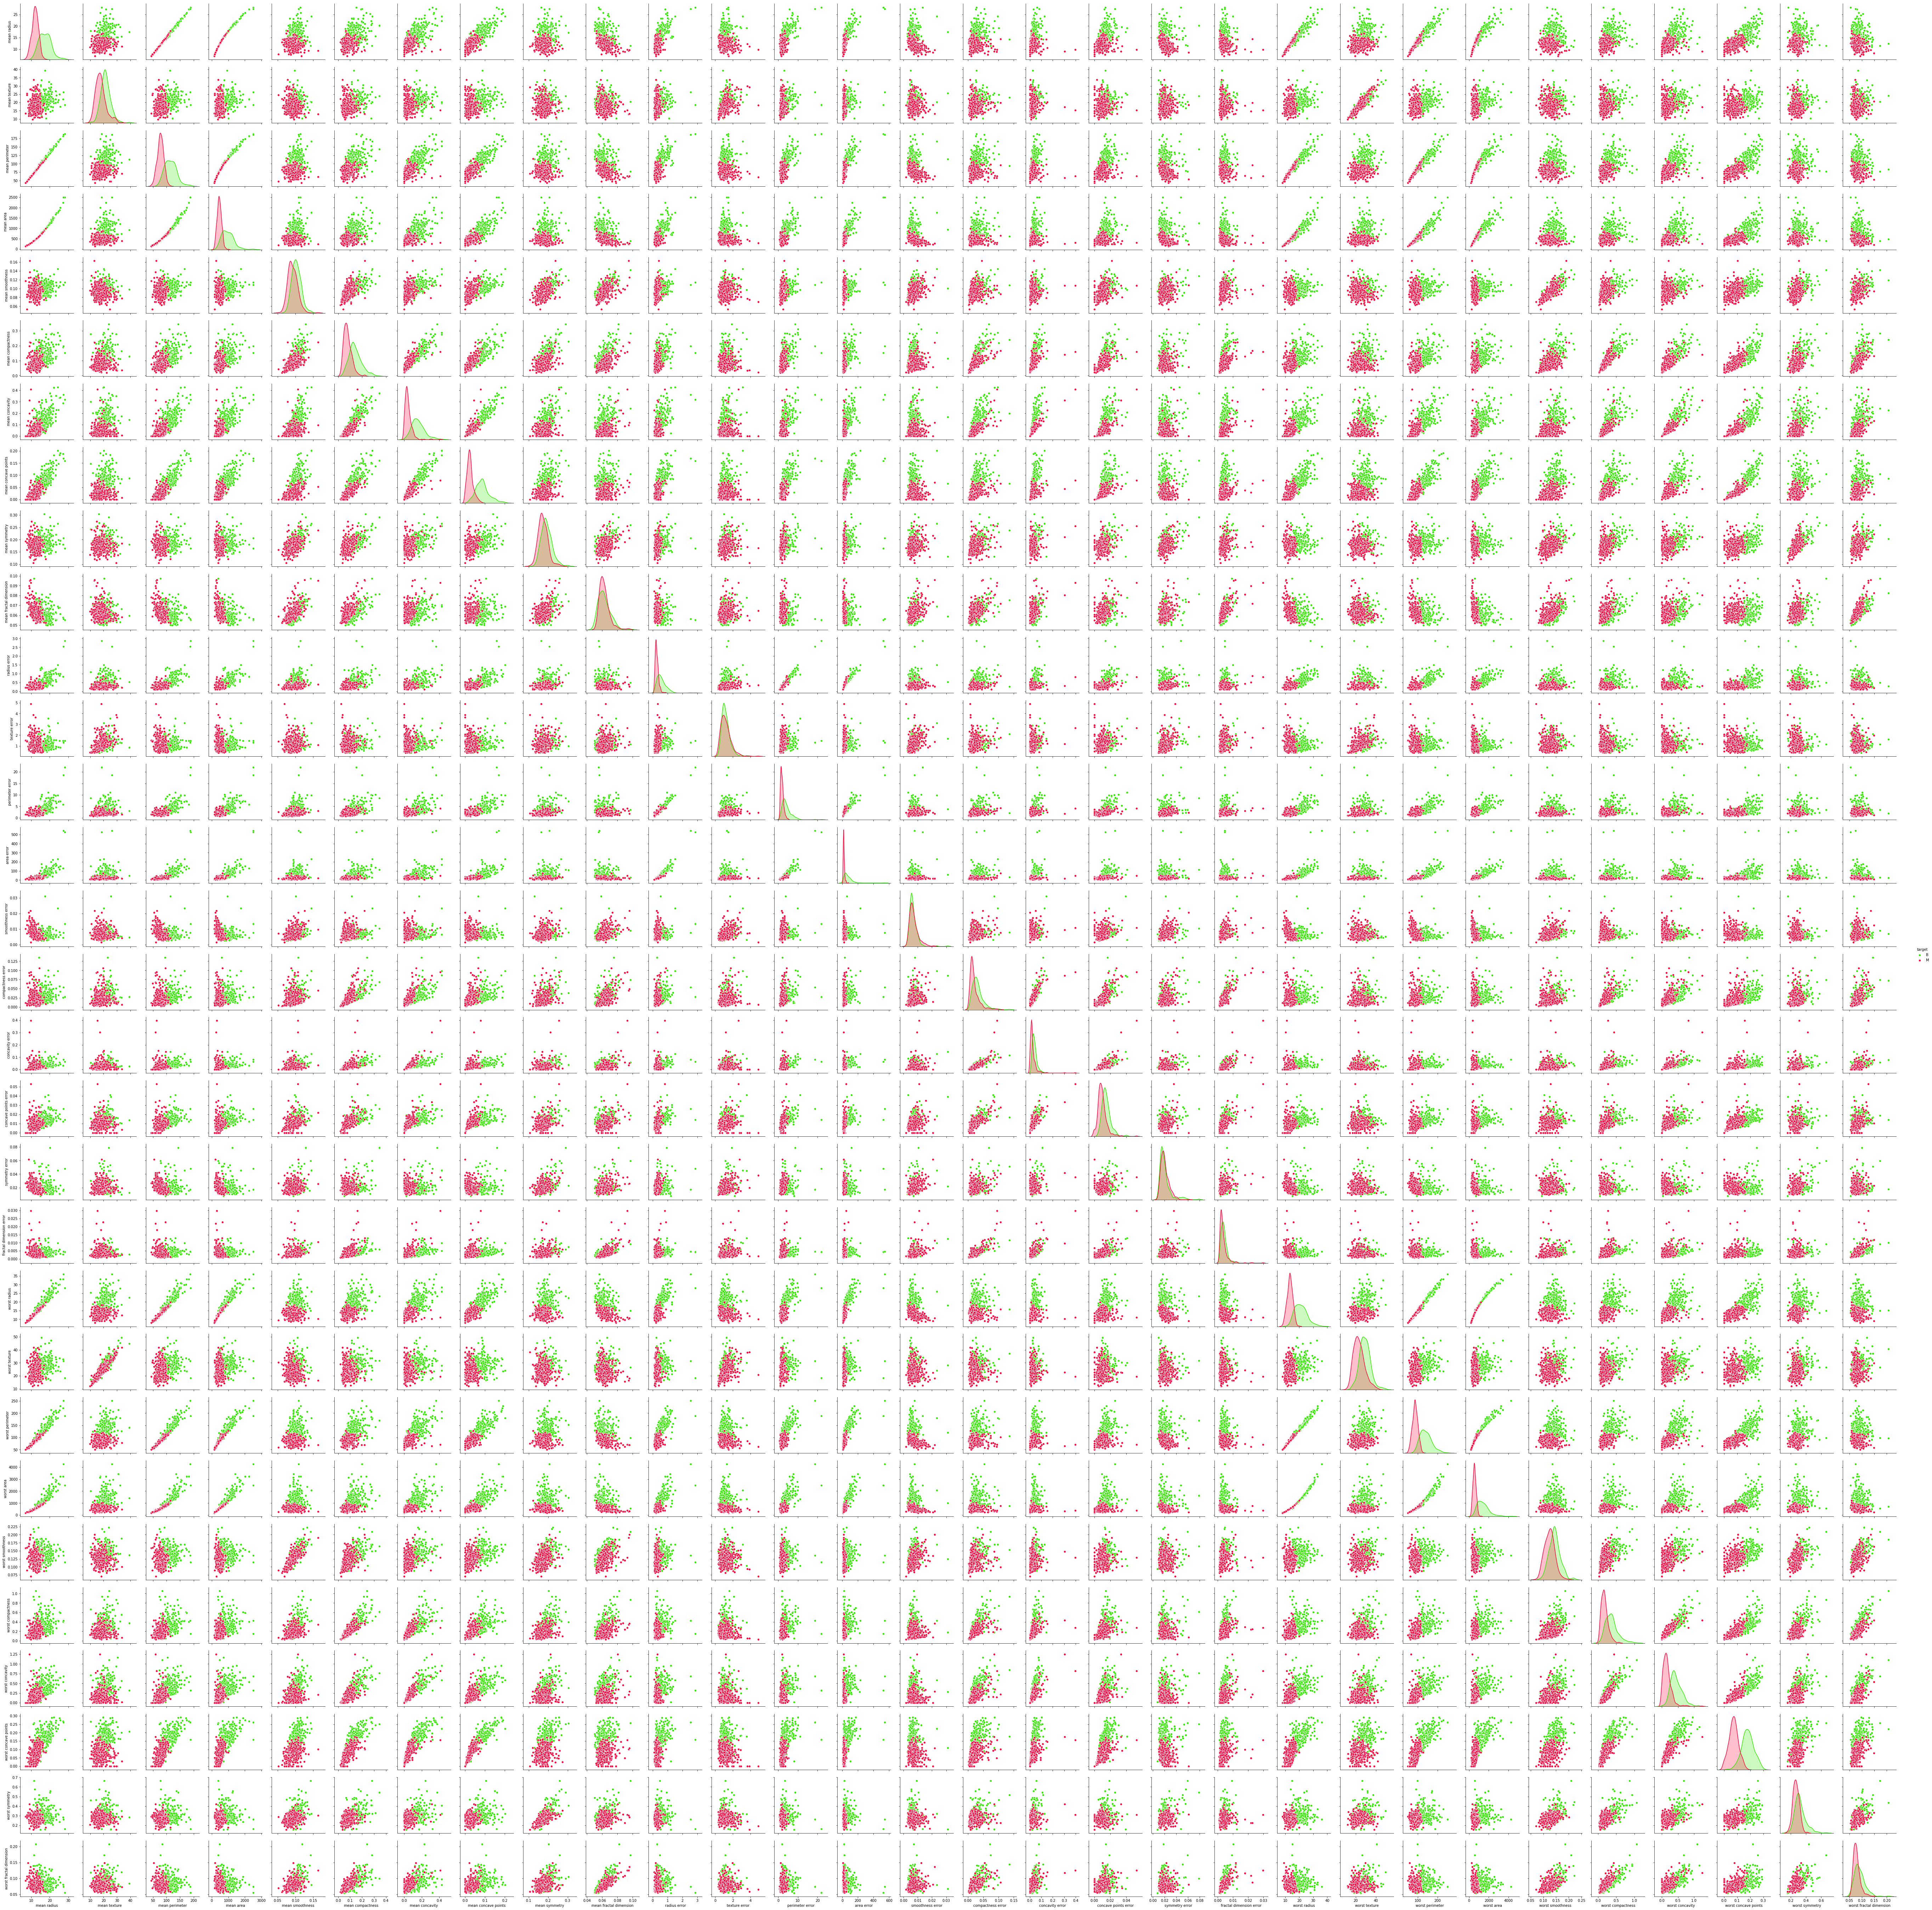

In [16]:
data['target'] = data['class'].map({0:'B',1:'M'}) # converting the data into categorical
g = sns.pairplot(data.drop('class', axis = 1), hue="target", palette='prism');
data=data.drop('target',axis=1)

# Train test split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('class', axis=1)
Y = data['class']

In [19]:
X

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0         17.990         10.38  ...          0.4601                  0.11890
1         20.570         17.77  ...          0.2750                  0.08902
2         19.690         21.25  ...          0.3613                  0.08758
3         11.420         20.38  ...          0.6638                  0.17300
4         20.290         14.34  ...          0.2364                  0.07678
5         12.450         15.70  ...          0.3985                  0.12440
6         18.250         19.98  ...          0.3063                  0.08368
7         13.710         20.83  ...          0.3196                  0.11510
8         13.000         21.82  ...          0.4378                  0.10720
9         12.460         24.04  ...          0.4366                  0.20750
10        16.020         23.24  ...          0.2948                  0.08452
11        15.780         17.89  ...          0.3792                  0.10480
12        19.170         24.80  ...          0.3176                  0.10230
13        15.850         23.95  ...          0.2809                  0.06287
14        13.730         22.61  ...          0.3596                  0.14310
15        14.540         27.54  ...          0.4218                  0.13410
16        14.680         20.13  ...          0.3029                  0.08216
17        16.130         20.68  ...          0.3706                  0.11420
18        19.810         22.15  ...          0.2768                  0.07615
19        13.540         14.36  ...          0.2977                  0.07259
20        13.080         15.71  ...          0.3184                  0.08183
21         9.504         12.44  ...          0.2450                  0.07773
22        15.340         14.26  ...          0.4667                  0.09946
23        21.160         23.04  ...          0.2822                  0.07526
24        16.650         21.38  ...          0.3613                  0.09564
25        17.140         16.40  ...          0.4066                  0.10590
26        14.580         21.53  ...          0.4264                  0.12750
27        18.610         20.25  ...          0.2341                  0.07421
28        15.300         25.27  ...          0.4027                  0.09876
29        17.570         15.05  ...          0.2756                  0.07919
..           ...           ...  ...             ...                      ...
539        7.691         25.44  ...          0.2790                  0.10660
540       11.540         14.44  ...          0.2329                  0.08134
541       14.470         24.99  ...          0.3187                  0.10230
542       14.740         25.42  ...          0.2722                  0.06956
543       13.210         28.06  ...          0.2473                  0.06443
544       13.870         20.70  ...          0.2249                  0.08492
545       13.620         23.23  ...          0.2642                  0.06953
546       10.320         16.35  ...          0.2681                  0.07399
547       10.260         16.58  ...          0.2691                  0.09479
548        9.683         19.34  ...          0.2552                  0.07920
549       10.820         24.21  ...          0.3059                  0.07626
550       10.860         21.48  ...          0.2458                  0.06592
551       11.130         22.44  ...          0.3169                  0.08032
552       12.770         29.43  ...          0.2407                  0.06484
553        9.333         21.94  ...          0.2435                  0.07393
554       12.880         28.92  ...          0.2372                  0.07242
555       10.290         27.61  ...          0.2226                  0.08283
556       10.160         19.59  ...          0.2262                  0.06742
557        9.423         27.88  ...          0.2475                  0.06969
558       14.590         22.68  ...          0.2258                  0.08004
5

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

In [21]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

# Perceptron Class

In [0]:
X_train = X_train.values
X_test = X_test.values

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$


In [0]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [0]:
perceptron = Perceptron()

0.94921875


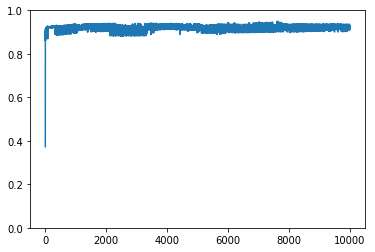

In [25]:
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.5)

In [26]:
Y_pred_test = perceptron.predict(X_test)
print("Testing Accuracy: ",accuracy_score(Y_pred_test, Y_test))

Testing Accuracy:  0.9473684210526315


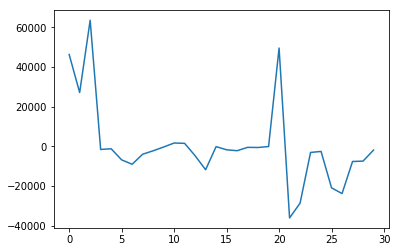

In [27]:
plt.plot(wt_matrix[-1,:])
plt.show()